<a href="https://colab.research.google.com/github/Yashasvi2003/Machine-Learning-Algorithms/blob/main/KNN(Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd

In [12]:
data=pd.read_csv('Wine Quality Dataset.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [14]:
x=data.drop('quality',axis=1) ## features (drop all columns except quality)
y=data['quality'] ##target (quality score)

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [17]:
##normalize the features whixh is an important step in knn
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [24]:
##convert the quality scores to binary classification(high quality vs low quality)
y_train_class=y_train.apply(lambda x:1 if x >= 7 else 0)
y_test_class=y_test.apply(lambda x:1 if x >= 7 else 0)

In [19]:
##initialize k-NN classifier with k=5
knn_classifier=KNeighborsClassifier(n_neighbors=5)

In [22]:
##train the classifier
knn_classifier.fit(x_train,y_train_class)

KNeighborsClassifier()

In [23]:
##predict the labels for the test set
y_pred_class=knn_classifier.predict(x_test)
##print(y_pred_class)


In [25]:
##evaluate the classification model
accuracy=accuracy_score(y_test_class, y_pred_class)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test_class,y_pred_class))

Accuracy: 0.84
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       753
           1       0.69      0.54      0.60       227

    accuracy                           0.84       980
   macro avg       0.78      0.73      0.75       980
weighted avg       0.83      0.84      0.83       980



In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [28]:
##confusion matrix
con_matrix=confusion_matrix(y_test_class,y_pred_class)

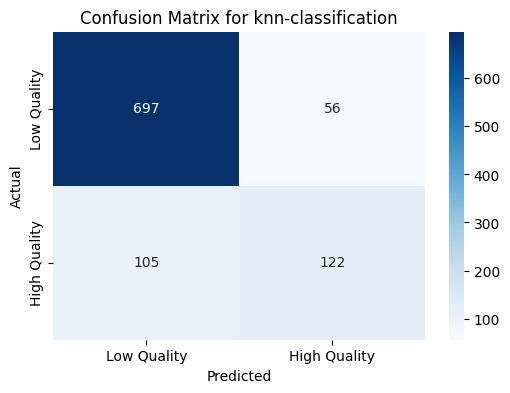

In [29]:
##plotting the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(con_matrix,annot=True,fmt='d',cmap='Blues', xticklabels=["Low Quality", "High Quality"], yticklabels=["Low Quality", "High Quality"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for knn-classification')
plt.show()

In [31]:
##plotting the classification report
from sklearn.metrics import classification_report

In [32]:
classification_rep=classification_report(y_test_class, y_pred_class, target_names=["Low Quality","High Quality"])
print(classification_rep)

              precision    recall  f1-score   support

 Low Quality       0.87      0.93      0.90       753
High Quality       0.69      0.54      0.60       227

    accuracy                           0.84       980
   macro avg       0.78      0.73      0.75       980
weighted avg       0.83      0.84      0.83       980

